# First time payments analysis

### Import the necessary dependencies and the dataset.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopy.distance

In [8]:
payments = pd.read_csv('1st_adyen_rides-success-and-fail.csv')
payments

,created,device_name,device_os_version,country,city_id,lat,lng,real_destination_lat,real_destination_lng,user_id,...,distance,ride_distance,price,ride_price,price_review_status,price_review_reason,is_successful_payment,name,card_bin,failed_attempts
0,2016-01-23 23:10:07,motorolaXT1562,motorola6.0.1,ee,2.0,58.378220,26.710402,58.363243,26.737696,218,...,773,3017,4.5000,4.5000,ok,NaN,1,**** 0810,NaN,0
1,2016-05-04 06:01:32,iPhone6,iOS10.3.3,ee,1.0,59.424130,24.646359,59.397548,24.660957,266,...,43,4241,4.4000,4.4000,ok,NaN,1,**** 9115,NaN,0
2,2016-08-27 16:42:22,HTCHTC 10,HTC7.0,ee,1.0,59.413508,24.743706,59.448500,24.804887,551,...,1654,6347,7.2000,7.2000,ok,NaN,1,**** 0634,516903.0,0
3,2016-10-25 07:14:27,iPhone6S,iOS10.3.2,ee,1.0,59.419938,24.744795,59.431686,24.720801,798,...,883,2638,3.1000,3.1000,ok,NaN,1,**** 8730,541747.0,0
4,2016-09-09 12:46:47,"iPhone5,2",iOS9.3.4,ee,1.0,59.471328,24.890557,59.427836,24.774460,944,...,1109,10288,9.0999,9.0999,ok,NaN,1,**** 3503,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304048,2017-06-21 05:05:50,iPhone6S,iOS10.2.1,za,54.0,-25.746974,28.114173,-25.748204,28.132867,1916704,...,2640,3334,40.0000,40.0000,ok,NaN,1,**** 2904,523982.0,0
304049,2017-07-03 12:34:48,iPhone6,iOS10.3.2,ge,15.0,41.709336,44.802954,41.693171,44.803201,2017910,...,608,3959,4.4000,4.4000,ok,NaN,1,**** 9886,431572.0,0
304050,2017-07-25 14:00:26,BoostShaker-Slim,Boost4.4.2,za,54.0,-26.077051,28.084813,-26.095041,28.080559,2086329,...,1566,2936,30.0000,30.0000,ok,NaN,1,**** 8607,425668.0,0
304051,2017-07-30 14:11:14,iPhone6,iOS10.3.2,ro,325.0,44.441192,26.020226,44.435512,26.116617,2161013,...,1723,9708,23.8999,23.8999,ok,NaN,1,**** 6850,554593.0,0


### EDA

Let's start our analysis with some very quick EDA, just to have an overview of the different columns and of the distribution of successful and unsuccessful payments.

In [3]:
payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 304053 entries, 0 to 304052
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   created                304053 non-null  object 
 1   device_name            304053 non-null  object 
 2   device_os_version      304053 non-null  object 
 3   country                304052 non-null  object 
 4   city_id                303734 non-null  float64
 5   lat                    304053 non-null  float64
 6   lng                    304053 non-null  float64
 7   real_destination_lat   304026 non-null  float64
 8   real_destination_lng   304026 non-null  float64
 9   user_id                304053 non-null  int64  
 10  order_id               304053 non-null  int64  
 11  order_try_id           304053 non-null  int64  
 12  distance               304053 non-null  int64  
 13  ride_distance          304053 non-null  int64  
 14  price                  304053 non-nu

Text(0, 0.5, 'Frequency')

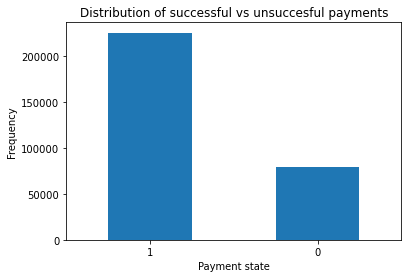

In [4]:
payment_state = pd.value_counts(payments['is_successful_payment'], sort = True)

payment_state.plot(kind = 'bar', rot=0)

plt.title("Distribution of successful vs unsuccesful payments")

plt.xlabel("Payment state")

plt.ylabel("Frequency")

This shows that the number of failed payments is actually quite high! We need to come up with some developments as soon as possible to fight this fraudulent activity!
In order to focus on failed payments and try to find some insightful patterns, let's divide the dataset into fraud (where payments failed) and successful (where payments went through).

In [9]:
fraud = payments[payments['is_successful_payment']==0]

normal = payments[payments['is_successful_payment']==1]

In [13]:
pd.set_option('display.max_columns', 500)
fraud

,created,device_name,device_os_version,country,city_id,lat,lng,real_destination_lat,real_destination_lng,user_id,order_id,order_try_id,distance,ride_distance,price,ride_price,price_review_status,price_review_reason,is_successful_payment,name,card_bin,failed_attempts
18,2017-06-14 13:00:25,OnePlusONEPLUS A3003,OnePlus7.1.1,ee,1.0,59.420321,24.697136,59.330578,24.472601,2853,21120623,21562355,491,19033,0.0,0.0,ok,NaN,0,**** 2822,516867.0,0
34,2016-03-03 15:11:32,OnePlusONE E1003,OnePlus6.0.1,ee,1.0,59.416350,24.692010,59.406597,24.658743,5031,4434056,4448162,1461,2775,0.0,0.0,ok,NaN,0,**** 8997,529412.0,0
39,2016-01-22 07:02:45,iPhone7,iOS10.1,ee,1.0,59.412517,24.648007,59.399812,24.669028,5820,4022321,4029058,307,2947,0.0,0.0,ok,NaN,0,**** 1472,516737.0,0
52,2015-12-12 22:02:40,samsungSM-G930F,samsung7.0,ee,1.0,59.390862,24.721267,59.305744,24.671476,10115,3604292,3603395,1421,10453,8.8,8.8,ok,NaN,0,**** 9380,516737.0,0
57,2016-02-12 23:06:59,SonyF5121,Sony7.0,ee,1.0,59.411968,24.650227,59.433578,24.795090,10997,4238564,4248764,899,11286,0.0,0.0,ok,NaN,0,**** 9779,557014.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304035,2017-01-17 05:27:15,samsungSM-N900,samsung5.0,za,54.0,-26.014147,28.101215,-26.035955,28.068351,1059244,10736277,11161054,1797,5479,55.0,55.0,ok,NaN,0,**** 8655,522262.0,0
304036,2017-02-14 19:26:53,HTCHTC One_M8,HTC6.0,za,54.0,-26.083742,27.876919,-26.072602,27.887509,1190156,11961061,12390222,3439,1906,0.0,25.0,ok,NaN,0,**** 0324,484162.0,0
304038,2017-05-22 15:10:27,iPhone7,iOS10.3.3,za,55.0,-34.083962,18.849969,-34.063482,18.812826,1290671,18859592,19252208,129,1945,0.0,20.0,ok,NaN,0,**** 0039,402167.0,2
304039,2017-05-06 00:37:16,samsungSM-G900H,samsung6.0.1,za,55.0,-33.820529,18.478342,-33.816071,18.496946,1390289,17361523,17764850,79,23390,175.0,175.0,ok,NaN,0,**** 6124,528497.0,0


## 1. Correlation between user ID and card number.

### In a perfect world, if these are all first payments, to each unique user ID should correspond a unique card number. However, this isn't a perfect world, so the question we need to ask ourselves would be: are there any users that used the same card? Or are there cards that were used for a suspicious amount of transactions? This could be a signal of credit card theft and/or creation of many fake accounts.

In [7]:
fraud.groupby('card_bin')['user_id'].value_counts().head(20)

card_bin  user_id
370276.0  1512031    1
          1549673    1
370277.0  616406     1
          2034637    1
370286.0  1766567    1
370288.0  1129991    1
370720.0  543669     1
370730.0  1137877    1
370740.0  1218251    1
370750.0  1207009    1
370773.0  2057672    1
370781.0  1080471    1
          1091797    1
370782.0  1089711    1
          1934234    1
370783.0  1006726    1
          1176191    1
          1892116    1
          1918100    1
370784.0  952401     1
Name: user_id, dtype: int64

In [8]:
fraud.card_bin.value_counts().loc[lambda x : x>4]

528497.0    5264
557368.0    3111
484162.0    2925
557367.0    2626
412752.0    2369
            ... 
431946.0       5
417687.0       5
545478.0       5
419845.0       5
448308.0       5
Name: card_bin, Length: 1028, dtype: int64

These results show that several cards correspond to more than one user and that 1028 cards were used more than 5 times.
One useful development would be to set a filter that detects cards that were used more than a certain threshold.

## 2. Distinction between 'real' cancellations and 'fake' ones.

### This dataset doesn't contain information  about cancellations,  but it might be useful to compare the information found in step 1 with cancellation data. Trip cancellation doesn't always mean fraud, it also might be a 'normal' customer who genuinely changed his mind or his plans. In light of this, it would be key to distinguish between 'good' and 'bad' cancellations.
### If the same users who appear to share the same credit card info appear to have also high cancellation rates, then this might be a pattern. For example, systemic cancellations are frequently in the case of so called friendly fraud, when the driver tells the passenger to cancel the trip and pay him directly, in this way excluding the riding service from the process. In other cases, strategic cancellations are employed as a strategy to disrupt businesses.


## 2. Short distances. 

### Detecting short distance rides could be key to fighting failed payments. It might be the case that fraudsters try to test their strategy with short rides to see if it works.

In [9]:
short_distances = fraud[fraud['ride_distance']<1000]
short_distances

,created,device_name,device_os_version,country,city_id,lat,lng,real_destination_lat,real_destination_lng,user_id,...,distance,ride_distance,price,ride_price,price_review_status,price_review_reason,is_successful_payment,name,card_bin,failed_attempts
345,2017-01-19 08:56:10,iPhone7Plus,iOS10.3.2,ee,1.0,59.411524,24.667434,59.411709,24.666729,33864,...,694,60,0.0,0.0,ok,NaN,0,**** 5948,547025.0,1
919,2016-01-23 22:10:00,iPhoneSE,iOS10.3.2,lv,3.0,56.954353,24.125238,56.950877,24.131941,88878,...,1420,564,0.0,1.1,ok,NaN,0,**** 7294,527584.0,0
1018,2016-11-25 22:57:13,samsungSM-G930F,samsung7.0,ee,1.0,59.434857,24.746625,59.434674,24.746642,71288,...,901,49,0.0,0.0,ok,NaN,0,**** 4850,516867.0,1
1279,2017-05-15 12:13:37,iPhone6Plus,iOS10.2,ee,1.0,59.445771,24.886181,59.446128,24.885954,126107,...,142,35,2.5,2.5,ok,NaN,0,**** 6379,516737.0,0
1452,2015-10-20 22:30:09,iPhone7Plus,iOS10.3.2,ee,2.0,58.379721,26.725617,58.376414,26.748535,1267,...,80,506,0.0,0.0,ok,NaN,0,**** 8870,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
302926,2017-05-07 17:34:20,"iPhone7,2",iOS9.3.1,za,54.0,-26.191853,28.004802,-26.197723,28.007152,1271549,...,24,962,20.0,20.0,ok,NaN,0,**** 3464,528497.0,4
303119,2017-07-24 09:37:41,iPhone5S,iOS10.3.3,az,335.0,40.376823,49.844591,40.382474,49.842820,2148592,...,217,712,0.0,1.5,ok,NaN,0,**** 6945,402865.0,0
303615,2016-12-30 20:25:28,samsungSM-G361H,samsung5.1.1,za,54.0,-26.089137,28.000630,-26.091280,28.004635,998328,...,1656,636,0.0,25.0,ok,NaN,0,**** 8499,541282.0,1
303839,2017-07-14 21:34:39,samsungSM-G361H,samsung5.1.1,za,55.0,-33.920516,18.422249,-33.952831,18.632597,2034056,...,169,474,0.0,20.0,ok,NaN,0,**** 5031,528497.0,0


Nearly 2000 trips..we might be onto something here. As in the previous case, simply setting up a filter for all the trips below 1000 meters might be a helpful development.

## 3. GPS discrepancies. 

### Discrepancies between the actual distance (between the coordinates) and the ride_distance values. 
### In the dataset, there are the pickup coordinates, destination coordinates and the total distance of the ride. But what if users are manipulating the GPS data in order to make their trip appear shorter on the app (or longer in the case of drivers)? Or what if passengers are cancelling trips in the middle of a ride to trick the app and pay less? Calculating the distance between the coordinates and comparing it to the distance reported on the dataset might be a useful strategy to detect unsual patterns.

Let's first create a new dataset that includes only the coordinates data and then get rid of any null values.

In [10]:
fraud_coordinates = fraud[['lat','lng','real_destination_lat','real_destination_lng','ride_distance']]
fraud_coordinates

,lat,lng,real_destination_lat,real_destination_lng,ride_distance
18,59.420321,24.697136,59.330578,24.472601,19033
34,59.416350,24.692010,59.406597,24.658743,2775
39,59.412517,24.648007,59.399812,24.669028,2947
52,59.390862,24.721267,59.305744,24.671476,10453
57,59.411968,24.650227,59.433578,24.795090,11286
...,...,...,...,...,...
304035,-26.014147,28.101215,-26.035955,28.068351,5479
304036,-26.083742,27.876919,-26.072602,27.887509,1906
304038,-34.083962,18.849969,-34.063482,18.812826,1945
304039,-33.820529,18.478342,-33.816071,18.496946,23390


In [11]:
print(fraud_coordinates.columns[fraud_coordinates.isnull().any()])


Index(['real_destination_lat', 'real_destination_lng'], dtype='object')


In [12]:
fraud_coordinates = fraud_coordinates.dropna(subset=['real_destination_lat', 'real_destination_lng'])

Let's create a function that will calculate the distance between the coordinates and append the results to a new column 'calculated_distances'.

In [13]:
def distance_calculator(df,col1, col2,col3, col4):
   
    distances = []    
    
    for i in range(len(col1)):
        
        coord1 = (col1.values[i],col2.values[i])

        coord2 = (col3.values[i], col4.values[i])
       
        distances.append(geopy.distance.geodesic(coord1, coord2).m)
            
    df['calculated_distance']= distances
            

        



In [14]:
distance_calculator(fraud_coordinates,fraud_coordinates['lat'],fraud_coordinates['lng'],fraud_coordinates['real_destination_lat'],fraud_coordinates['real_destination_lng'])

/var/folders/j_/l3vzl03913z2sw704nqb4lfc0000gn/T/ipykernel_17517/2512576503.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['calculated_distance']= distances


In [15]:
fraud_coordinates

,lat,lng,real_destination_lat,real_destination_lng,ride_distance,calculated_distance
18,59.420321,24.697136,59.330578,24.472601,19033,16213.603172
34,59.416350,24.692010,59.406597,24.658743,2775,2179.324289
39,59.412517,24.648007,59.399812,24.669028,2947,1851.680843
52,59.390862,24.721267,59.305744,24.671476,10453,9896.345223
57,59.411968,24.650227,59.433578,24.795090,11286,8568.877210
...,...,...,...,...,...,...
304035,-26.014147,28.101215,-26.035955,28.068351,5479,4081.504819
304036,-26.083742,27.876919,-26.072602,27.887509,1906,1626.610635
304038,-34.083962,18.849969,-34.063482,18.812826,1945,4112.807116
304039,-33.820529,18.478342,-33.816071,18.496946,23390,1791.951927


Next, let's create another function that will flag cases in which the difference between 'ride_distance' and 'calculated_distance' is higher than 5000 meters.

In [16]:
def flag_raiser(df,col1,col2):
    
    flags=[]
    
    for i in range(len(col1)):
        if (col1.values[i]- col2.values[i]> 5000) | (col2.values[i]- col1.values[i]> 5000):
            flags.append('yes')
        else:
            flags.append('no')
                
    df['to_be_flagged']= flags



In [17]:
flag_raiser(fraud_coordinates,fraud_coordinates['ride_distance'], fraud_coordinates['calculated_distance'])

/var/folders/j_/l3vzl03913z2sw704nqb4lfc0000gn/T/ipykernel_17517/1858720083.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['to_be_flagged']= flags


In [18]:
fraud_coordinates

,lat,lng,real_destination_lat,real_destination_lng,ride_distance,calculated_distance,to_be_flagged
18,59.420321,24.697136,59.330578,24.472601,19033,16213.603172,no
34,59.416350,24.692010,59.406597,24.658743,2775,2179.324289,no
39,59.412517,24.648007,59.399812,24.669028,2947,1851.680843,no
52,59.390862,24.721267,59.305744,24.671476,10453,9896.345223,no
57,59.411968,24.650227,59.433578,24.795090,11286,8568.877210,no
...,...,...,...,...,...,...,...
304035,-26.014147,28.101215,-26.035955,28.068351,5479,4081.504819,no
304036,-26.083742,27.876919,-26.072602,27.887509,1906,1626.610635,no
304038,-34.083962,18.849969,-34.063482,18.812826,1945,4112.807116,no
304039,-33.820529,18.478342,-33.816071,18.496946,23390,1791.951927,yes


Now we have a new column that shows us when there are these kind of GPS discrepancies and flags them.

## 4. Correlation between devices used and number of failed payments

### Is there a correlation between fraudulent activity and devices used? 

In [34]:
fraud_device =fraud.device_name.value_counts().loc[lambda x : x>1000]
fraud_device

iPhone6            5244
iPhone6S           4917
iPhone5S           4077
iPhone7            3773
iPhone7,2          1916
iPhoneSE           1884
iPhone8,1          1514
samsungSM-G935F    1376
iPhone6,2          1341
iPhone7Plus        1340
samsungSM-G920F    1337
HUAWEIALE-L21      1276
iPhone5            1257
samsungSM-G930F    1164
Name: device_name, dtype: int64

It looks like iPhone devices have been used the most. Does this mean that this specific OS is most commonly used for fraud purposes? It would seem so. One strategy would be to cross reference the device versions with credit card information and (if present in a different dataset) IP addresses and phone numbers of the users.
This could highlight interesting patterns:

- In step 1, we found out that many users share the same credit card number and that more than 1000 cards were used in more than 5 first payments. What if many of these users share the same device? This might be the same person that is creating many fake accounts using one device and one (probably stolen) card.

- If the same number and IP address matches more users, this might the same fraudster using the same device and number to create many fake accounts
- If the same IP address matches different numbers and users, these might be different fraudsters using different phone numbers but the same device.



## 5. Do failed payments occur more often during certain  time frames more than others?

### This question might not lead to any insightful answers, but we do have the time stamps, so why not check if some patterns are visible.

## 6. Machine learning to detect patterns

### This development is more of a general one that is related to all the previous points; today machine learning has become an integral part in fraud detection. Especially in the case of small teams, the contribution of machine learning is indispensable and priceless. 
### Any rule, threshold or correlation like the ones mentioned above can be implemented into a machine learning model that can do the heavy lifting for us and help us detect outliers when dealing with big amounts of data.
### There are many models that can be used: Isolation Forest Algorithm, Local Outlier Factor, Logistic Regression, Support Vector Machines.